In [1]:
import tensorflow as tf
import keras
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import load_model, Model
from keras.layers import *
import os
import sys
import numpy as np
from score_dataset_helpers import *
import pandas as pd

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
base_dir = 'C:/Users/bened/OneDrive/Arbeit/Lernen/python_training/data_dual_inputs/'
train_dir = base_dir + 'train'
validation_dir = base_dir + 'validation'
test_dir = base_dir + 'test'

## Define model

In [222]:
f1, f2, f3 = 8,16,32
k_size = (3,3)

pics_input = Input(shape = (75, 250, 3))
pics_c1 = Conv2D(filters = f1, kernel_size = k_size, activation = "relu")(pics_input)
pics_m1 = MaxPooling2D(k_size)(pics_c1)
pics_c2 = Conv2D(filters = f2, kernel_size = k_size, activation = "relu")(pics_m1)
pics_m2 = MaxPooling2D(k_size)(pics_c2)
#pics_c3 = Conv2D(filters = f3, kernel_size = k_size, activation = "relu")(pics_m2)
#pics_m3 = MaxPooling2D((2,2))(pics_c3)
pics_f = Flatten()(pics_m2)
pics_d = Dense(20, activation = "relu")(pics_f)

nums_input = Input(shape = ([1]))
nums_features = Dense(5, activation = "relu")(nums_input)

conc_layer = concatenate([pics_d, nums_features])
dense_1 = Dense(100, activation = "relu")(conc_layer)
#dense_12 = Dense(100, activation = "softmax")(dense_1)
dense_2 = Dense(1, activation = "sigmoid")(dense_1)

model = Model(inputs = [pics_input, nums_input], outputs = dense_2)
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["acc"])

In [198]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_37 (InputLayer)           (None, 75, 250, 3)   0                                            
__________________________________________________________________________________________________
conv2d_42 (Conv2D)              (None, 73, 248, 8)   224         input_37[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_42 (MaxPooling2D) (None, 24, 82, 8)    0           conv2d_42[0][0]                  
__________________________________________________________________________________________________
conv2d_43 (Conv2D)              (None, 22, 80, 16)   1168        max_pooling2d_42[0][0]           
__________________________________________________________________________________________________
max_poolin

## Create vectors of scores from pictures

In [5]:
train_scores = train_dir + "/score"
train_pics = train_dir + "/pics"

In [6]:
train_names_scores = [f for f in os.listdir(train_scores)]
train_names_pics = [f for f in os.listdir(train_pics)]

In [7]:
print(str(len(train_names_scores)) + " training files for scores")
print(str(len(train_names_pics)) + " training files for pictures")

517 training files for scores
517 training files for pictures


In [9]:
train_dataset_score = create_dataset("score", train_names_scores, base_dir + "train/")

In [10]:
def get_result(result):
    resultstr = ''
    for i in range(5):
        resultstr += str(np.argmax(result[i]))
    return resultstr

In [11]:
score_model = load_model("C:/Users/bened/OneDrive/Arbeit/Lernen/python_training/models/score_v2.h5")

In [136]:
#Create vectors for scores and for labels
score_vec = []
for i in range(len(train_names_scores)):
    y_pred = score_model.predict(train_dataset_score[i].reshape(1, 50, 160, 1))
    score_vec.append(get_result(y_pred))

label_vec = ['up' in x for x in train_names_pics]
label_vec = np.array(label_vec)
label_array = label_vec.astype(float)

In [118]:
print_dat = pd.DataFrame({'score' : score_vec, 'label' : label_array, 'orig_name' : train_names_scores})
print_dat

,label,orig_name,score
0,0,right_1.png,00008
1,0,right_10.png,00073
2,0,right_100.png,00172
3,0,right_101.png,00185
4,0,right_102.png,00190
5,0,right_105.png,00200
6,0,right_106.png,00200
7,0,right_107.png,00226
8,0,right_108.png,00238
9,0,right_109.png,00243


In [276]:
pic_array = np.zeros((len(train_names_pics), 75, 250, 3))

for i in range(len(train_names_pics)):
    x = load_img(train_pics + '/' + train_names_pics[i], target_size = (75, 250))
    #x = img_to_array(x)
    pic_array[i] = x

In [278]:
pic_array[1][50]

array([[255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [100., 100., 100.],
       [ 83.,  83.,  83.],
       [ 83.,  83.,  83.],
       [ 83.,  83.,  83.],
       [ 83.,  83.,  83.],
       [ 83.,  83.,  83.],
       [ 83.,  83.,  83.],
       [ 83.,  83.,  83.],
       [100., 100., 100.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
 

In [281]:
pic_array = np.array(pic_array)
pic_array /= 255
score_array = np.array(score_vec)
score_array = np.float32(score_array)

In [282]:
pic_array.shape

(517, 75, 250, 3)

In [256]:
score_array.shape

(517,)

In [257]:
label_array.shape

(517,)

In [292]:
x = [1, 2, 3, 4, 5, 6,7,8,9, 500, 510, 511, 512, 513, 514]
#x = [1,2,3, 500, 501, 502, 503, 504]
#x = [1,2,3,4,5]
x

[1, 2, 3, 4, 5, 6, 7, 8, 9, 500, 510, 511, 512, 513, 514]

In [295]:
pic_array_test = pic_array[x]
score_array_test = score_array[x]
label_array_test = label_array[x]
model.fit([pic_array_test, score_array_test], label_array_test, epochs = 10, validation_split = 0.1)

Train on 13 samples, validate on 2 samples
Epoch 1/10
13/13 [==============================] - 1s 39ms/step - loss: 1.1730 - acc: 0.6923 - val_loss: 7.2232 - val_acc: 0.0000e+00
Epoch 2/10
13/13 [==============================] - 0s 7ms/step - loss: 1.7111 - acc: 0.6923 - val_loss: 8.6153 - val_acc: 0.0000e+00
Epoch 3/10
13/13 [==============================] - 0s 7ms/step - loss: 1.9965 - acc: 0.6923 - val_loss: 8.8010 - val_acc: 0.0000e+00
Epoch 4/10
13/13 [==============================] - 0s 7ms/step - loss: 2.0375 - acc: 0.6923 - val_loss: 7.9230 - val_acc: 0.0000e+00
Epoch 5/10
13/13 [==============================] - 0s 7ms/step - loss: 1.8616 - acc: 0.6923 - val_loss: 6.0996 - val_acc: 0.0000e+00
Epoch 6/10
13/13 [==============================] - 0s 7ms/step - loss: 1.4976 - acc: 0.6923 - val_loss: 3.4940 - val_acc: 0.0000e+00
Epoch 7/10
13/13 [==============================] - 0s 7ms/step - loss: 0.9940 - acc: 0.6923 - val_loss: 0.7933 - val_acc: 0.0000e+00
Epoch 8/10
13/13 [

In [296]:
model.predict([pic_array_test, score_array_test])

array([[0.33709517],
       [0.68201923],
       [0.7135602 ],
       [0.7353099 ],
       [0.76255745],
       [0.76439935],
       [0.82760257],
       [0.8455351 ],
       [0.856292  ],
       [0.98255324],
       [0.99881005],
       [0.9990728 ],
       [0.4396042 ],
       [0.99949956],
       [0.9995746 ]], dtype=float32)

In [289]:
label_array_test

array([0., 0., 0., 1., 1., 1., 1., 1.])

In [300]:
model.fit([pic_array, score_array], label_array, epochs = 10, shuffle = True, batch_size = 100, validation_split = 0.2)

Train on 413 samples, validate on 104 samples
Epoch 1/10
413/413 [==============================] - 2s 6ms/step - loss: 0.0555 - acc: 0.9806 - val_loss: 0.3193 - val_acc: 0.9135
Epoch 2/10
413/413 [==============================] - 2s 5ms/step - loss: 0.0514 - acc: 0.9831 - val_loss: 0.2195 - val_acc: 0.9423
Epoch 3/10
413/413 [==============================] - 2s 5ms/step - loss: 0.0532 - acc: 0.9806 - val_loss: 0.2874 - val_acc: 0.9231
Epoch 4/10
413/413 [==============================] - 2s 5ms/step - loss: 0.0505 - acc: 0.9782 - val_loss: 0.3576 - val_acc: 0.8846
Epoch 5/10
413/413 [==============================] - 2s 5ms/step - loss: 0.0506 - acc: 0.9831 - val_loss: 0.2686 - val_acc: 0.9231
Epoch 6/10
413/413 [==============================] - 2s 5ms/step - loss: 0.0570 - acc: 0.9782 - val_loss: 0.1966 - val_acc: 0.9423
Epoch 7/10
413/413 [==============================] - 2s 5ms/step - loss: 0.0499 - acc: 0.9806 - val_loss: 0.3692 - val_acc: 0.8942
Epoch 8/10
413/413 [==========

In [125]:
pic = pic_array[100]
pic = np.expand_dims(pic, axis = 0)
score = score_array[100]
score = np.expand_dims(score, axis = 0)
model.predict([pic, score])

array([[0.]], dtype=float32)

In [301]:
model.predict([pic_array, score_array])

array([[3.89619470e-02],
       [7.31648703e-04],
       [7.37705113e-06],
       [4.92259045e-04],
       [3.76784641e-07],
       [9.85143288e-07],
       [2.87474744e-04],
       [4.02610131e-05],
       [4.29731421e-03],
       [7.31212867e-06],
       [5.00469876e-04],
       [9.04501940e-04],
       [1.82148869e-06],
       [1.45334275e-02],
       [8.38314372e-05],
       [1.45753855e-02],
       [1.72834316e-05],
       [5.64544716e-05],
       [4.65149246e-03],
       [1.09496951e-01],
       [9.49319201e-06],
       [9.40888654e-03],
       [7.26230137e-05],
       [1.91930849e-02],
       [2.66760253e-06],
       [5.66043425e-04],
       [4.65766666e-03],
       [8.72428791e-05],
       [2.62252591e-03],
       [4.81290597e-04],
       [3.75214498e-03],
       [5.69396143e-05],
       [1.16283074e-02],
       [7.74383487e-04],
       [1.16120465e-02],
       [1.29536330e-03],
       [3.76942829e-04],
       [5.13705927e-05],
       [1.29154942e-04],
       [1.24394577e-02],


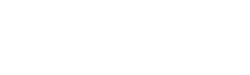

In [254]:
array_to_img(pic_array[1])

In [252]:
pic_array *= 255

In [270]:
pic_array[500][20]

array([[255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
 